***NOTE to TF***: *The `.pdf`, `.ipynb`, and `.md` versions of this document are identical. Math doesn’t render correctly in markdown on github, and we didn’t know if you’d prefer a notebook or a pdf file.*

# AutoDiff Package - Group 30

## Introduction

This software aims to numerically evaluate the derivative of any function with high precision utilizing automatic differentiation (AD). Specifically, the Jacobian matrix of dimension $n \times m$ of any function $func: \mathbb{R}^m \mapsto \mathbb{R}^n$ will be computed. Automatic differentiation is different from numerical differentiation and symbolic differentiation, which are introduced in the following:

1.  Numerical differentiation, i.e., differentiation with the method of finite difference, can become unstable depending on step size and the particular function we’re trying to differentiate.

2.  Symbolic differentiation: A difficult example:

$$
 f(x,y,z) = \frac{\cos(\exp(\frac{-5x^2}{y}))}{\frac{\sin(x)}{x^3}-\mathrm{erf}(z)}
$$

Symbolic differentiation (such as `sympy`) performs well for simple math forms, but becomes complex with arbitrary functions, and requires that every function have an analytical representation. This is very computationally expensive and almost never implemented in application.

*Why is AD important?*

First of all, AD dissects each function and its derivatives to a sequence of elementary functions. The chain rule is applied repeatedly on these elementary terms. Accuracy is maintained because differentiating elementary operations is simple and minimal error is propagated over the process. Efficiency is also maintained because increasing order does not increase computation difficulty. Also, AD computes partial derivatives, or the Jacobian matrices, which are one of the most common steps in science and engineering. One important application is optimization, which is extremely useful and implemented in every field such as machine learning. One advantage of AD is high accuracy, which is an essential requirement to computation because small errors could accumulate in higher dimensions and over iterations and result in a catastrophe. Another advantage of AD is efficiently. Efficiency is very important because the time and energy are usually limited for a particular project.

## Background

*The Chain Rule*

The chain rule is applied when the derivatives of nested functions are computed. A simple case is $n(x) = g(f(x))$, with the derivative $n'(x) = g'(f(x)) \cdot f'(x)$

*The Graph Structure*

We can visualize each evaluation step in an AD process with a computation graph. For example, we have a simple function

$$
f\left(x\right) = a x^2 + 5
$$

The computation graph is the following:

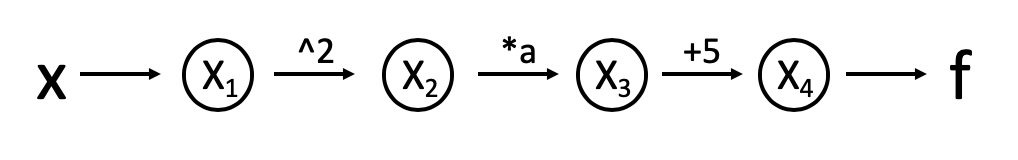

*The Evaluation Table*

We can also demonstrate each evaluation using an evaluation table. Using the same example at $x = 2$:

<table><colgroup><col style="width: 5%" /><col style="width: 18%" /><col style="width: 13%" /><col style="width: 28%" /><col style="width: 33%" /></colgroup><thead><tr class="header"><th style="text-align: center;">Step</th><th style="text-align: center;">Elementary Operations</th><th style="text-align: center;">Numerical Value</th><th style="text-align: center;"><span class="math inline">$\frac{\mathrm{d}f}{\mathrm{d}x}$</span></th><th style="text-align: center;"><span class="math inline">$\frac{\mathrm{d}f}{\mathrm{d}x}$</span> Value</th></tr></thead><tbody><tr class="odd"><td style="text-align: center;"><span class="math inline"><em>x</em><sub>1</sub></span></td><td style="text-align: center;"><span class="math inline"><em>x</em></span></td><td style="text-align: center;"><span class="math inline">2</span></td><td style="text-align: center;"><span class="math inline"><em>ẋ</em><sub>1</sub></span></td><td style="text-align: center;"><span class="math inline">1</span></td></tr><tr class="even"><td style="text-align: center;"><span class="math inline"><em>x</em><sub>2</sub></span></td><td style="text-align: center;"><span class="math inline"><em>x</em><sub>1</sub><sup>2</sup></span></td><td style="text-align: center;"><span class="math inline">4</span></td><td style="text-align: center;"><span class="math inline">2<em>x</em><sub>1</sub><em>ẋ</em><sub>1</sub></span></td><td style="text-align: center;"><span class="math inline">4</span></td></tr><tr class="odd"><td style="text-align: center;"><span class="math inline"><em>x</em><sub>3</sub></span></td><td style="text-align: center;"><span class="math inline"><em>a</em><em>x</em><sub>2</sub></span></td><td style="text-align: center;"><span class="math inline">4<em>a</em></span></td><td style="text-align: center;"><span class="math inline"><em>a</em><em>ẋ</em><sub>2</sub></span></td><td style="text-align: center;"><span class="math inline">4<em>a</em></span></td></tr><tr class="even"><td style="text-align: center;"><span class="math inline"><em>x</em><sub>4</sub></span></td><td style="text-align: center;"><span class="math inline"><em>x</em><sub>3</sub> + 5</span></td><td style="text-align: center;"><span class="math inline">4<em>a</em> + 5</span></td><td style="text-align: center;"><span class="math inline"><em>ẋ</em><sub>3</sub></span></td><td style="text-align: center;"><span class="math inline">4<em>a</em></span></td></tr></tbody></table>

## How to use `autodiff`

High-level interaction with `autodiff` is simple. The core data structure is a `Number`, which stores both a value and a derivative. After instantiation, a number’s derivative is `1`:

Using elementary operations will update derivatives according to the chain rule:

``` python
>>> import autodiff
>>> x = autodiff.Number(3)
>>> x.value
3
>>> x.deriv[x]
1
>>> y = x**2
>>> y.value
9
>>> y.deriv[x]
6
```

Note that the `deriv` attribute is a dict storing partial derivatives with respect to each `Number` object involved in preceding elementary operations.

When any elementary operation takes in two `Number()` objects, that elementary operation will return a `Number()` with a partial derivative with respect to every key of both `Number()` objects:

``` python
>>> x = autodiff.Number(2)
>>> y = autodiff.Number(3)
>>> def f(x, y, a=3):
>>>     return a * x * y
>>> q = f(x, y, a=3)
>>> q.deriv[x]
9
>>> q.deriv[y]
6
>>> q.deriv
{Number(value=2): 9, Number(value=3): 6}
```

Similarly, `autodiff` can work with vector functions of scalars. In these cases, each value in `deriv` is an array with the same shape as the output vector:

``` python
x = autodiff.Number(np.pi / 2)
y = autodiff.Number(3 * np.pi / 2)

def f(x, y):
    return autodiff.array((
        y * autodiff.sin(x),
        x * autodiff.sin(y)
    ))
q = f(x,y)
```

``` python
>>> q.deriv[x]
autodiff.array([0, 1])
>>> q.deriv[y]
autodiff.array([1, 0])
```

The `autodiff` package also works for scalar functions of vectors and vector functions of vectors, which behave the same.

Of course, most users will like to work with Jacobians and gradients rather than a `dict` of partial derivatives. Doing so is simple through the `jacobian` method. When an expression returns a scalar, `jacobian` will return that expression’s gradient. When an expression returns a vector, `jacobian` will return that expression’s Jacobian as a two-dimensional array.

``` python
>>> x = autodiff.array((1, 2))
>>> y = autodiff.array((3, 4))

>>> q.Jacobian((*x, *y))
autodiff.array([3, 4, 1, 2])
>>> q.Jacobian((*x, *y)).shape
(4,)
```

Or with a vector function:

``` python
>>> x = autodiff.Number(np.pi / 2)
>>> y = autodiff.Number(3 * np.pi / 2)

>>> def f(x, y):
        return autodiff.array((
            y * autodiff.sin(x),
            x * autodiff.sin(y)
        ))

>>> q = f(x,y)
>>> q.Jacobian((x, y))
autodiff.array([[0, 1],
                [1, 0]])
>>> q.jacobian((x, y)).shape
(2, 2)
```

Note that `autodiff.Number.jacobian()` does require the user to specify an order of input `Number` objects to ensure consistency within the user’s own code. Otherwise, `autodiff` would have to infer which element belongs to which function input. As the user strings together multiple elementary operations, it is likely that `autodiff`’s understanding would differ from the user’s. An example of the suggested usage is:

``` python
x = autodiff.Number(2)
y = autodiff.Number(3)
z = autodiff.Number(4)

order = (x, y, z)

# The gradient of f1 and f2 do not have an inherent order.
# If we displayed Numbers in the order they were used, the implied order would be
# (grad_x, grad_z, grad_y)---likely not what the user desires.
f1 = x**z
f2 = f1 * x * y
```

``` python
>>> f2.deriv[x]
240
>>> f2.deriv[y]
32
>>> f2.deriv[z]
66.542
>>> f2.jacobian((order))
autodiff.array([240, 32, 66.542])
```

## Software Organization

### Directory structure

    .
    ├── README.md
    ├── .travis.yml
    ├── setup.py
    └── docs
        ├── milestone1.md
        ├── image
        ├── toipynb.sh
        └── topdf.sh
    └── demos
        ├── simple_demo.py
        ├── ...
        └── complex_demo.py
    └── autodiff
        └── __init__.py
    └── tests
        └── test_autodiff.py

#### Modules

The`autodiff` package is the main package that implements the forward mode of automatic differentiation. The `test_autodiff` package runs tests. The directory `demos` contains a series of demos and examples for using our package, ranging from simple to complex.

#### Testing

All tests live in `tests/test_autodiff.py`. We will use both `TravisCI` and `CodeCov` to distribute reports.

#### Installation and packaging

**Subject to change in final package**

1.  Ensure setuptools, pip are up to date

    ``` bash
    python -m pip install --upgrade pip setuptools
    ```

2.  Install package from github

    ``` bash
    pip install git+https://github.com/rocketscience0/cs207-FinalProject.git
    ```

Our workflow is based off of this [guide](https://packaging.python.org/tutorials/installing-packages/).

`setup.py` will specify required pieces of metadata, such as the version and dependencies. We will use `setuptools` as a distribution build tool. Why `setuptools` as opposed to `distutils`? As noted by the [Python Packaging User Guide](https://packaging.python.org/guides/tool-recommendations/), `setuptools` is outside the standard library, allowing for consistency across different Python versions.

Later on, we may publish a final version of our package (currently a Github repo) as an open-source Python package on PyPI. Using pip will allow users to easily install via `pip install autodiff`.

## Implementation

### Core data structures and classes

The `autodiff` package has two core data structures, the `Number` (a scalar that stores a value and a derivative) and the `array`, which subclasses the `numpy.ndarray`. If the user wishes, defining a new type of number is easy:

``` python
class NewInt(Number):
    def __init__(self, a, b):
        super(self).__init__(a, b)
        self.value = int(a)
        self.deriv = b
```

### Methods and name attributes

The `Number` class overloads the following common elementary operations:

-   `+`
-   `-`
-   `*`
-   `/`
-   `**`
-   `@`

We have also included the following elementary operations, all of which use their `numpy` counterparts.

-   `autodiff.sin()`
-   `autodiff.cos()`
-   `autodiff.tan()`
-   `autodiff.asin()`
-   `autodiff.acos()`
-   `autodiff.atan()`
-   `autodiff.log()`
-   `autodiff.exp()`
-   `autodiff.sqrt()`

Defining custom elementary functions is straightforward, using the `elementary` decorator (this is the same method we use internally). The decorator takes one input, a function with the same arguments as the elementary operation, but calculates the derivative of the operation rather than the value. We call this derivative function internally.

``` python
def my_pow_deriv(a, b):
    """ Returns the derivative of my_pow at a and b
    """
    return b * a ** (b - 1)

@elementary(my_pow_deriv)
def my_pow(a, b):
    return pow(a, b)
```

``` python
def sin_deriv(a):
    """ Returns the derivative of the sin() elemental operation"""
    try:
        return a.deriv * np.cos(a.value)
    except AttributeError
        return np.cos(a)
    
@elementary(sin_deriv)
def sin(a):
    try ...
    return np.sin(a)
```

The `Number()` class overloads `__mul__` and `__rmul__`, along with other elementary operations as follows. The `autodiff.array` class overloads vector operations similarly.

``` python
x = Number(2)
y = Number(3)

class Number():
    ...

    def _mult_deriv(self, other):
        try:
            self.deriv[self] * other.value

        except ...

    @elementary(self._mult_deriv)
    def __mul__(self, other):
        
        try:
            out = Number(self.value, other.value)
            out.deriv = _mult_deriv(self, other)

        except ...
```